In [2]:
import numpy as np
import pandas as pd
# Correctly initialize the DataFrame with column names
theta_rej = pd.DataFrame(columns=['Theta', 'Rejection Rate'])
FILE_NAME = 'results_random_init_5days.txt'
with open(FILE_NAME, 'r') as results:
    lines = results.readlines()
    for line in lines:
        parts = line.split(',')
        if len(parts) == 2:  # Check if the line is correctly formatted
            theta = float(parts[0].split(':')[1].strip())
            rej_rate = float(parts[1].split(':')[1].strip())
            
            # Append the new row to the DataFrame, set ignore_index=True to reindex
            theta_rej.loc[len(theta_rej)] = [theta,rej_rate]
theta_rej

,Theta,Rejection Rate
0,20.0,0.496639
1,5.0,0.491607
2,3.0,0.492433
3,5.0,0.492558
4,10.0,0.499894
...,...,...
66,0.0,0.489552
67,10.0,0.501152
68,4.0,0.506741
69,0.0,0.499923


In [3]:
# Calculating mean rejection rate for each theta
mean_rejection_rates = theta_rej.groupby('Theta')['Rejection Rate'].mean()
mean_rejection_rates

Theta
0.0     0.499186
0.5     0.497476
1.0     0.498430
1.5     0.500199
2.0     0.496687
3.0     0.497933
4.0     0.500061
5.0     0.496029
10.0    0.496418
20.0    0.495557
30.0    0.501911
Name: Rejection Rate, dtype: float64

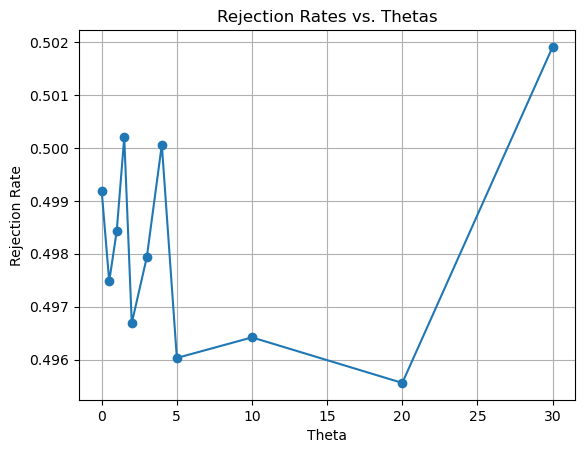

In [8]:
from matplotlib import pyplot as plt
# Plot
theta_list = mean_rejection_rates.index
rej_rate_list = mean_rejection_rates.values
plt.plot(theta_list, rej_rate_list, marker='o')
plt.xlabel('Theta')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates vs. Thetas')
# plt.xticks(theta_list, rotation=90)
plt.grid(True)
plt.show()